In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from json import loads
import sys

sys.path.append("../")
from reef.plot import stack_images, plot_sample, plot_stack

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_dir = Path("../../data/raw")
images_dir = data_dir / "train_images"

In [3]:
df_train = pd.read_csv(data_dir / 'train.csv')
df_train['path'] = 'video_' + df_train.video_id.astype(str) + '/' + df_train.video_frame.astype(str) + '.jpg'
df_train['path'] = df_train.path.map(lambda x: (images_dir / x).as_posix())
df_train['annotations'] = df_train.annotations.map(lambda x: loads(x.replace("'", '"')))
df_train

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,path
0,0,40258,0,0,0-0,[],../../data/raw/train_images/video_0/0.jpg
1,0,40258,1,1,0-1,[],../../data/raw/train_images/video_0/1.jpg
2,0,40258,2,2,0-2,[],../../data/raw/train_images/video_0/2.jpg
3,0,40258,3,3,0-3,[],../../data/raw/train_images/video_0/3.jpg
4,0,40258,4,4,0-4,[],../../data/raw/train_images/video_0/4.jpg
...,...,...,...,...,...,...,...
23496,2,29859,10755,2983,2-10755,[],../../data/raw/train_images/video_2/10755.jpg
23497,2,29859,10756,2984,2-10756,[],../../data/raw/train_images/video_2/10756.jpg
23498,2,29859,10757,2985,2-10757,[],../../data/raw/train_images/video_2/10757.jpg
23499,2,29859,10758,2986,2-10758,[],../../data/raw/train_images/video_2/10758.jpg


(<Figure size 2880x288 with 1 Axes>, <AxesSubplot:>)

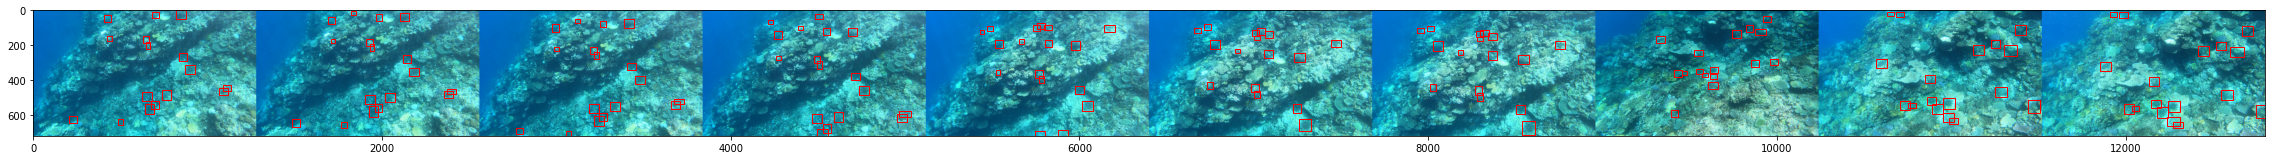

In [19]:
# sample_seq = df_train.iloc[20:30]
sample_seq = df_train[df_train.annotations.map(len) > 15].sample(10).sort_values('image_id')

plot_stack(
    sample_seq.path, 
    sample_seq.annotations, 
    axis="width"
)